In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
bgg = pd.read_csv("boardgames_ranks.csv")

In [5]:
bgg.columns

Index(['id', 'name', 'yearpublished', 'rank', 'bayesaverage', 'average',
       'usersrated', 'abstracts_rank', 'cgs_rank', 'childrensgames_rank',
       'familygames_rank', 'partygames_rank', 'strategygames_rank',
       'thematic_rank', 'wargames_rank'],
      dtype='object')

In [10]:
bgg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149451 entries, 0 to 149450
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   149451 non-null  int64  
 1   name                 149451 non-null  object 
 2   yearpublished        149451 non-null  int64  
 3   rank                 149451 non-null  int64  
 4   bayesaverage         149451 non-null  float64
 5   average              149451 non-null  float64
 6   usersrated           149451 non-null  int64  
 7   abstracts_rank       1377 non-null    float64
 8   cgs_rank             349 non-null     float64
 9   childrensgames_rank  1041 non-null    float64
 10  familygames_rank     3070 non-null    float64
 11  partygames_rank      861 non-null     float64
 12  strategygames_rank   2831 non-null    float64
 13  thematic_rank        1571 non-null    float64
 14  wargames_rank        4166 non-null    float64
dtypes: float64(10), i

<p>Costruisco un dataframe con i soli anni di interesse</p>

In [7]:
bgg_XX_sec = bgg.loc[bgg['yearpublished'] > 1900]


In [8]:
bgg_XX_sec.head(3)

,id,name,yearpublished,rank,bayesaverage,average,usersrated,abstracts_rank,cgs_rank,childrensgames_rank,familygames_rank,partygames_rank,strategygames_rank,thematic_rank,wargames_rank
0,224517,Brass: Birmingham,2018,1,8.42232,8.60825,41537,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,161936,Pandemic Legacy: Season 1,2015,2,8.38689,8.53347,51764,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
2,174430,Gloomhaven,2017,3,8.37512,8.60960,60034,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN


In [9]:
bgg_XX_sec.sort_values('yearpublished')['yearpublished'].unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026])

In [10]:
bgg_XX_sec.columns

Index(['id', 'name', 'yearpublished', 'rank', 'bayesaverage', 'average',
       'usersrated', 'abstracts_rank', 'cgs_rank', 'childrensgames_rank',
       'familygames_rank', 'partygames_rank', 'strategygames_rank',
       'thematic_rank', 'wargames_rank'],
      dtype='object')

In [11]:

bgg_XX_sec.groupby(['yearpublished'])['id'].agg('count').reset_index()


,yearpublished,id
0,1901,8
1,1902,14
2,1903,29
3,1904,20
4,1905,30
...,...,...
121,2022,6669
122,2023,6016
123,2024,1261
124,2025,90


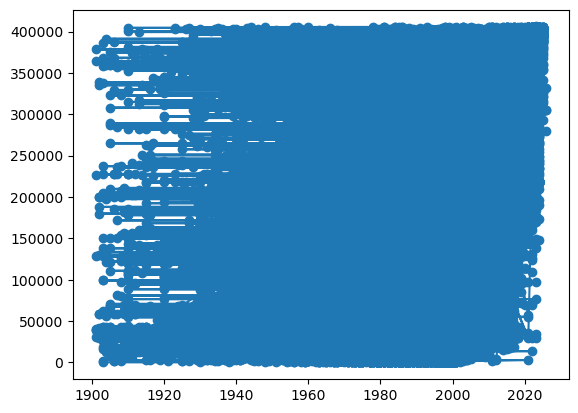

In [33]:

# plot
plt.plot('yearpublished', 'id', data=bgg_XX_sec, linestyle='-', marker='o')
plt.show()

array([[<Axes: title={'center': 'yearpublished'}>]], dtype=object)

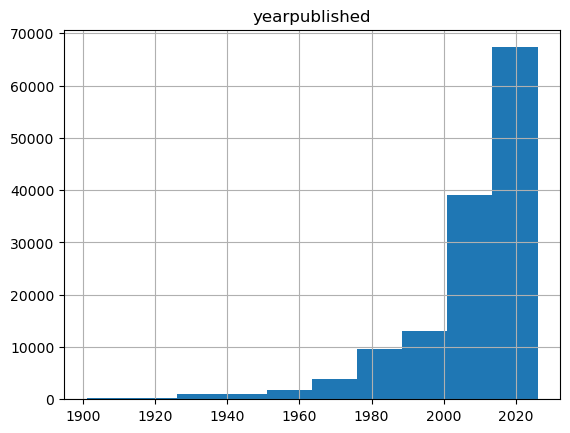

In [12]:
bgg_XX_sec.columns
bgg_XX_sec.hist(column='yearpublished')

In [36]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [56]:
np.random.seed(10**7)
mu = 121
sigma = 21
x = mu + sigma * np.random.randn(1000)
num_bins = 10

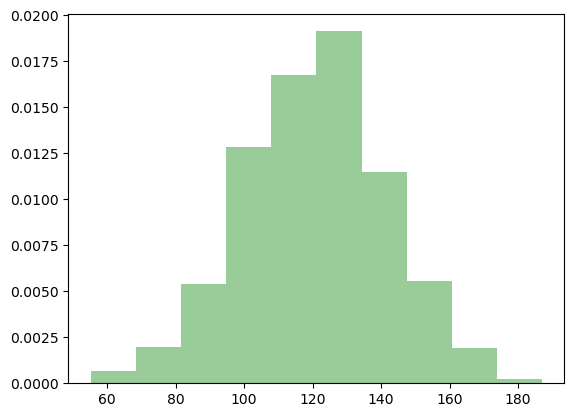

In [58]:
#len(bgg_XX_sec.sort_values('yearpublished')['yearpublished'].unique()),
 
n, bins, patches = plt.hist(x, num_bins, 
                            density = 2, 
                            color ='green',
                            alpha = 0.4)

In [44]:
bins

array([ 55.23882026,  81.58734127, 107.93586227, 134.28438328,
       160.63290429, 186.9814253 ])

<h1>Serie storiche con prophet</h1>

In [1]:
from prophet import Prophet

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/malefica/opt/anaconda3/envs/bgg/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [13]:
#bgg_XX_sec.groupby('yearpublished').agg(count("*").alias("count"))
bgg_prophet = bgg_XX_sec.groupby(['yearpublished'])['yearpublished'].count()

In [14]:
bgg_prophet = bgg_XX_sec[['yearpublished', 'id']].groupby('yearpublished', as_index=False).count()

In [15]:
bgg_prophet = bgg_prophet.drop(bgg_prophet[bgg_prophet.yearpublished > 2022].index)

In [16]:
bgg_prophet = bgg_prophet.rename(columns={"yearpublished": "ds", "id": "y"})

In [17]:
bgg_prophet['ds'] = pd.to_datetime(bgg_prophet.ds, format='%Y')

In [18]:
bgg_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      122 non-null    datetime64[ns]
 1   y       122 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [19]:
bgg_prophet.head()

,ds,y
0,1901-01-01,8
1,1902-01-01,14
2,1903-01-01,29
3,1904-01-01,20
4,1905-01-01,30


13:29:29 - cmdstanpy - INFO - Chain [1] start processing
13:29:29 - cmdstanpy - INFO - Chain [1] done processing
/Users/malefica/opt/anaconda3/envs/bgg/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/malefica/opt/anaconda3/envs/bgg/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


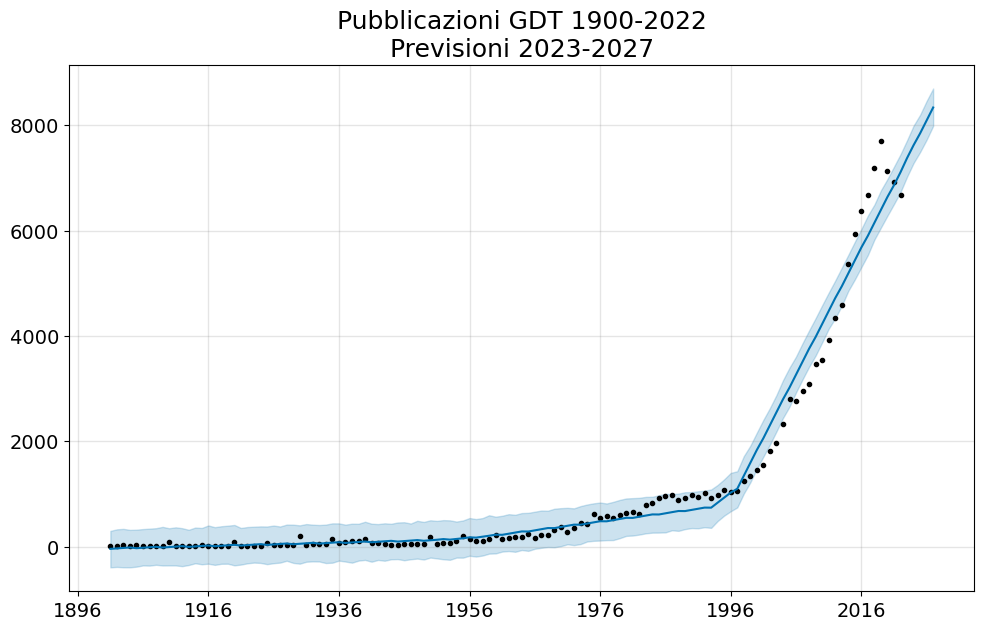

In [21]:
m = Prophet()
m.fit(bgg_prophet)
future = m.make_future_dataframe(5, freq='Y')
forecast = m.predict(future)
fig = m.plot(forecast, xlabel='year', ylabel='num_bg')
ax = fig.gca()
ax.set_title("Pubblicazioni GDT 1900-2022\nPrevisioni 2023-2027", size=18)
ax.set_xlabel("", size=14)
ax.set_ylabel("", size=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

In [154]:
# x axis values 
x = [2021,2030] 

In [155]:
# corresponding y axis values 
y = [15, 35] 

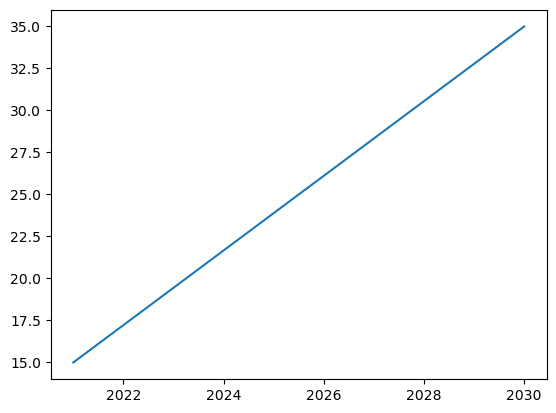

In [161]:
# plotting the points  
plt.plot(x, y) 

Text(0.5, 0, 'pippo')

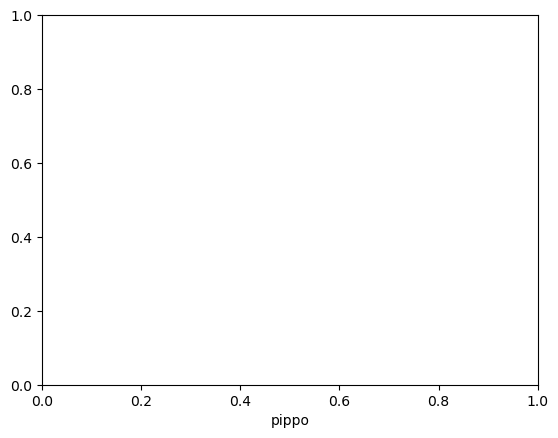

In [160]:
# naming the x axis 
plt.xlabel('pippo') 

Text(0, 0.5, 'y - axis')

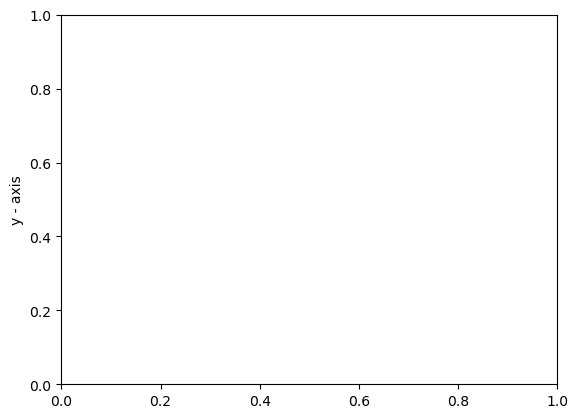

In [150]:
# naming the y axis 
plt.ylabel('M ') 

Text(0.5, 1.0, 'My first graph!')

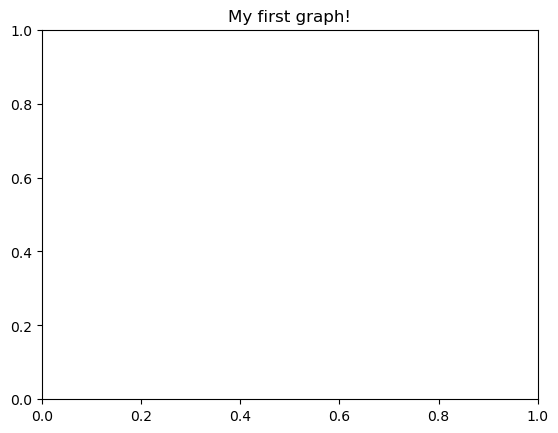

In [151]:
# giving a title to my graph 
plt.title('My first graph!') 

In [152]:
  # function to show the plot 
plt.show() 